In [1]:
import pandas as pd
import numpy as np

import random

import pickle
from sklearn.externals import joblib

from sklearn.preprocessing import scale, StandardScaler

from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
with open('master.pkl','rb') as p:
    dfx_y = pickle.load(p)

In [3]:
print(dfx_y.shape)
dfx_y = dfx_y.reset_index()
dfx_y.head()

(100000, 4)


,index,comment,transcript,com_tran_list,TED=1
0,0,Transgenderism is a mental fucking disease ! N...,"(Music) (Applause) Trevor Copp: When ""Dancing ...",[Transgenderism is a mental fucking disease ! ...,0
1,1,This is a wonderfully informative and hopeful ...,"Thank you so much, Chris. And it's truly a gre...",[This is a wonderfully informative and hopeful...,1
2,2,"As you are a Climate Change denier, I feel obl...","Thank you so much, Chris. And it's truly a gre...","[As you are a Climate Change denier, I feel ob...",1
3,3,if this started migrating itself into a normal...,"(Music) (Applause) Trevor Copp: When ""Dancing ...",[if this started migrating itself into a norma...,0
4,4,We are applauding our own absence is a powerfu...,"(Music) (Applause) Trevor Copp: When ""Dancing ...",[We are applauding our own absence is a powerf...,0


In [4]:
with open('svd_comments.pkl','rb') as picklefile:
    df2 = pickle.load(picklefile)

In [5]:
print(df2.shape)
df2 = df2.reset_index()
df2.head()

(100000, 10)


,index,0,1,2,3,4,5,6,7,8,9
0,0,0.016524,-0.006253,0.002719,0.000004,-0.003015,0.006835,-0.004977,-0.004460,-0.003085,-0.004221
1,1,0.161739,0.053766,0.060058,-0.112828,0.124430,-0.086072,-0.071893,-0.037568,-0.022300,-0.015814
2,2,0.108550,-0.047270,0.012682,-0.010828,-0.026289,-0.005126,0.007296,-0.025012,-0.030800,-0.008216
3,3,0.070030,-0.021546,0.007528,-0.000834,-0.007299,0.003508,-0.005931,-0.004316,-0.003534,-0.007534
4,4,0.014035,-0.000321,0.001313,-0.002434,-0.001320,0.002695,0.002846,0.000123,-0.004900,0.003657


In [6]:
with open('cosine_lev.pkl','rb') as picklefile:
    df3 = pickle.load(picklefile)

In [7]:
print(df3.shape)
df3 = df3.reset_index()
df3.head()

(100000, 4)


,index,comment,TED=1,cosine_sim,lev_distance
0,0,Transgenderism is a mental fucking disease ! N...,0,0.000000,14
1,1,This is a wonderfully informative and hopeful ...,1,0.084987,54
2,2,"As you are a Climate Change denier, I feel obl...",1,0.061111,52
3,3,if this started migrating itself into a normal...,0,0.023335,69
4,4,We are applauding our own absence is a powerfu...,0,0.011142,80


In [8]:
with open('all_all_simple_features.pkl','rb') as p:
    df4 = pickle.load(p)

In [9]:
print(df4.shape)
df4 = df4.reset_index()
df4.head()

(100000, 10)


,index,comment,length,tb_polarity,tb_subjectivity,nltk_vader_compound,target,troll,first_p,third_p,questions
0,0,Transgenderism is a mental fucking disease ! N...,59,-0.425000,0.500000,0.0000,0,1,0.0,0.000000,0.0
1,1,This is a wonderfully informative and hopeful ...,823,0.294444,0.536111,0.9882,1,1,0.0,0.333333,0.0
2,2,"As you are a Climate Change denier, I feel obl...",1210,-0.218056,0.416667,-0.2484,0,0,0.5,0.000000,0.0
3,3,if this started migrating itself into a normal...,173,0.125000,0.550000,0.6523,0,0,0.0,1.000000,0.0
4,4,We are applauding our own absence is a powerfu...,59,0.295833,0.666667,0.7096,0,0,0.0,0.000000,0.0


In [10]:
df = pd.concat([dfx_y,df2,df3,df4],axis=1)

In [11]:
print(df.shape)
df.head()

(100000, 32)


,index,comment,transcript,com_tran_list,TED=1,index,0,1,2,3,...,comment,length,tb_polarity,tb_subjectivity,nltk_vader_compound,target,troll,first_p,third_p,questions
0,0,Transgenderism is a mental fucking disease ! N...,"(Music) (Applause) Trevor Copp: When ""Dancing ...",[Transgenderism is a mental fucking disease ! ...,0,0,0.016524,-0.006253,0.002719,0.000004,...,Transgenderism is a mental fucking disease ! N...,59,-0.425000,0.500000,0.0000,0,1,0.0,0.000000,0.0
1,1,This is a wonderfully informative and hopeful ...,"Thank you so much, Chris. And it's truly a gre...",[This is a wonderfully informative and hopeful...,1,1,0.161739,0.053766,0.060058,-0.112828,...,This is a wonderfully informative and hopeful ...,823,0.294444,0.536111,0.9882,1,1,0.0,0.333333,0.0
2,2,"As you are a Climate Change denier, I feel obl...","Thank you so much, Chris. And it's truly a gre...","[As you are a Climate Change denier, I feel ob...",1,2,0.108550,-0.047270,0.012682,-0.010828,...,"As you are a Climate Change denier, I feel obl...",1210,-0.218056,0.416667,-0.2484,0,0,0.5,0.000000,0.0
3,3,if this started migrating itself into a normal...,"(Music) (Applause) Trevor Copp: When ""Dancing ...",[if this started migrating itself into a norma...,0,3,0.070030,-0.021546,0.007528,-0.000834,...,if this started migrating itself into a normal...,173,0.125000,0.550000,0.6523,0,0,0.0,1.000000,0.0
4,4,We are applauding our own absence is a powerfu...,"(Music) (Applause) Trevor Copp: When ""Dancing ...",[We are applauding our own absence is a powerf...,0,4,0.014035,-0.000321,0.001313,-0.002434,...,We are applauding our own absence is a powerfu...,59,0.295833,0.666667,0.7096,0,0,0.0,0.000000,0.0


In [12]:
df.columns

Index([              'index',             'comment',          'transcript',
             'com_tran_list',               'TED=1',               'index',
                           0,                     1,                     2,
                           3,                     4,                     5,
                           6,                     7,                     8,
                           9,               'index',             'comment',
                     'TED=1',          'cosine_sim',        'lev_distance',
                     'index',             'comment',              'length',
               'tb_polarity',     'tb_subjectivity', 'nltk_vader_compound',
                    'target',               'troll',             'first_p',
                   'third_p',           'questions'],
      dtype='object')

In [13]:
target = df['TED=1']
tcols = ['TED=1','other']
target.columns = tcols
target = target.drop('other',axis=1)
target = target['TED=1']

df = df.drop(['TED=1',
              'transcript',
              'com_tran_list',
              'level_0',
              'index',
              'comment'],axis=1)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,lev_distance,length,tb_polarity,tb_subjectivity,nltk_vader_compound,target,troll,first_p,third_p,questions
0,0.016524,-0.006253,0.002719,0.000004,-0.003015,0.006835,-0.004977,-0.004460,-0.003085,-0.004221,...,14,59,-0.425000,0.500000,0.0000,0,1,0.0,0.000000,0.0
1,0.161739,0.053766,0.060058,-0.112828,0.124430,-0.086072,-0.071893,-0.037568,-0.022300,-0.015814,...,54,823,0.294444,0.536111,0.9882,1,1,0.0,0.333333,0.0
2,0.108550,-0.047270,0.012682,-0.010828,-0.026289,-0.005126,0.007296,-0.025012,-0.030800,-0.008216,...,52,1210,-0.218056,0.416667,-0.2484,0,0,0.5,0.000000,0.0
3,0.070030,-0.021546,0.007528,-0.000834,-0.007299,0.003508,-0.005931,-0.004316,-0.003534,-0.007534,...,69,173,0.125000,0.550000,0.6523,0,0,0.0,1.000000,0.0
4,0.014035,-0.000321,0.001313,-0.002434,-0.001320,0.002695,0.002846,0.000123,-0.004900,0.003657,...,80,59,0.295833,0.666667,0.7096,0,0,0.0,0.000000,0.0


In [15]:
with open('target.pkl','wb') as picklefile:
    pickle.dump(target, picklefile)

### pick up pickle

In [16]:
with open('target.pkl','rb') as picklefile:
    target = pickle.load(picklefile)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,lev_distance,length,tb_polarity,tb_subjectivity,nltk_vader_compound,target,troll,first_p,third_p,questions
0,0.016524,-0.006253,0.002719,0.000004,-0.003015,0.006835,-0.004977,-0.004460,-0.003085,-0.004221,...,14,59,-0.425000,0.500000,0.0000,0,1,0.0,0.000000,0.0
1,0.161739,0.053766,0.060058,-0.112828,0.124430,-0.086072,-0.071893,-0.037568,-0.022300,-0.015814,...,54,823,0.294444,0.536111,0.9882,1,1,0.0,0.333333,0.0
2,0.108550,-0.047270,0.012682,-0.010828,-0.026289,-0.005126,0.007296,-0.025012,-0.030800,-0.008216,...,52,1210,-0.218056,0.416667,-0.2484,0,0,0.5,0.000000,0.0
3,0.070030,-0.021546,0.007528,-0.000834,-0.007299,0.003508,-0.005931,-0.004316,-0.003534,-0.007534,...,69,173,0.125000,0.550000,0.6523,0,0,0.0,1.000000,0.0
4,0.014035,-0.000321,0.001313,-0.002434,-0.001320,0.002695,0.002846,0.000123,-0.004900,0.003657,...,80,59,0.295833,0.666667,0.7096,0,0,0.0,0.000000,0.0


In [18]:
features = df

In [38]:
with open('features.pkl','wb') as picklefile:
    pickle.dump(features, picklefile)

### pick up pickle

In [40]:
with open('features.pkl','rb') as picklefile:
    features = pickle.load(picklefile)

In [19]:
features['RANDOM'] = [random.random() for i in range(len(features))]
features.head()

,0,1,2,3,4,5,6,7,8,9,...,length,tb_polarity,tb_subjectivity,nltk_vader_compound,target,troll,first_p,third_p,questions,RANDOM
0,0.016524,-0.006253,0.002719,0.000004,-0.003015,0.006835,-0.004977,-0.004460,-0.003085,-0.004221,...,59,-0.425000,0.500000,0.0000,0,1,0.0,0.000000,0.0,0.435646
1,0.161739,0.053766,0.060058,-0.112828,0.124430,-0.086072,-0.071893,-0.037568,-0.022300,-0.015814,...,823,0.294444,0.536111,0.9882,1,1,0.0,0.333333,0.0,0.722748
2,0.108550,-0.047270,0.012682,-0.010828,-0.026289,-0.005126,0.007296,-0.025012,-0.030800,-0.008216,...,1210,-0.218056,0.416667,-0.2484,0,0,0.5,0.000000,0.0,0.471856
3,0.070030,-0.021546,0.007528,-0.000834,-0.007299,0.003508,-0.005931,-0.004316,-0.003534,-0.007534,...,173,0.125000,0.550000,0.6523,0,0,0.0,1.000000,0.0,0.945030
4,0.014035,-0.000321,0.001313,-0.002434,-0.001320,0.002695,0.002846,0.000123,-0.004900,0.003657,...,59,0.295833,0.666667,0.7096,0,0,0.0,0.000000,0.0,0.247024


In [20]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [21]:
X_train = scale(X_train)
X_test = scale(X_test)

In [22]:
models = {}

# models['KNN'] = KNeighborsClassifier()
# models['LR'] = LogisticRegression()
# models['SVC'] = SVC()
# models['DecisionTree'] = DecisionTreeClassifier()
# models['GradientBoost'] = GradientBoostingClassifier()
# models['AdaBoost'] = AdaBoostClassifier()
models['RandomForest'] = RandomForestClassifier()

# RFparams = {n_estimators=1000,n_jobs=4, max_features=5,
#               class_weight='balanced_subsample',max_depth=10}

In [23]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, n_jobs=1, cv = 10)
    precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision')
    recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    print('Model: ' + name)
    print('Accuracy: ' + str(np.mean(scores)))
    print('Precision: ' + str(np.mean(precision)))
    print('Recall: ' + str(np.mean(recall)))
    print('f1: ' + str(np.mean(f1)))
    print("")

Model: RandomForest
Accuracy: 0.720728816076
Precision: 0.785709430633
Recall: 0.738187874664
f1: 0.759888579566



In [24]:
with open('rf_model.pkl','wb') as p:
    pickle.dump(model,p)

### pick up pickle

In [25]:
with open('rf_model.pkl','rb') as p:
    model = pickle.load(p)

In [26]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    print('Model: ' + name)
    print(classification_report(y_test,y_pred))
    print("")

Model: RandomForest
             precision    recall  f1-score   support

          0       0.63      0.70      0.66     11907
          1       0.79      0.72      0.75     18093

avg / total       0.72      0.72      0.72     30000




In [27]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec,label=name)
    plt.legend()
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

In [28]:
models_roc = {}

# models_roc['KNN'] = KNeighborsClassifier()
# models_roc['LR'] = LogisticRegression()
# models_roc['DecisionTree'] = DecisionTreeClassifier()
# models_roc['GradientBoost'] = GradientBoostingClassifier()
# models_roc['AdaBoost'] = AdaBoostClassifier()
models_roc['RandomForest'] = RandomForestClassifier()

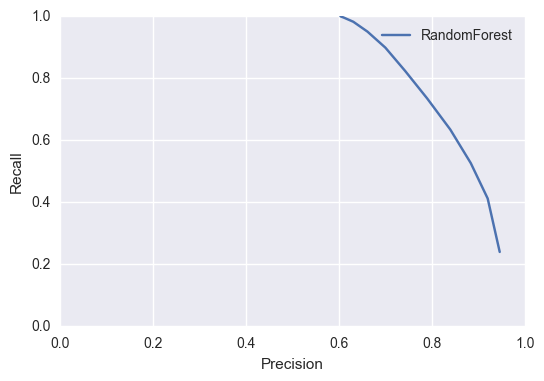

In [29]:
for name, model in models_roc.items():
    model.fit(X_train, y_train)
    recallvec, precisionvec, threshvec = pr_curve(y_test,model.predict_proba(X_test)[:,1])

Model:  RandomForest
0.794507766349



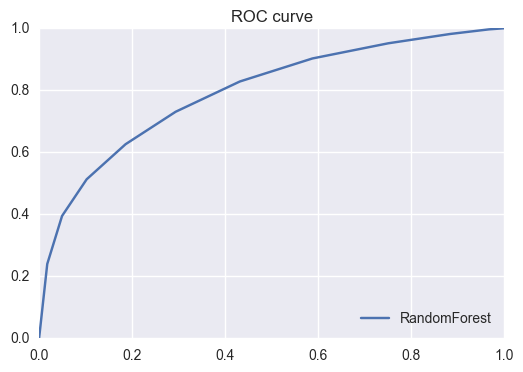

In [30]:
for name, model in models_roc.items():
    model.fit(X_train, y_train)
    y_pred = np.asarray(model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(np.asarray(y_test),y_pred)
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.title('ROC curve')
    print('Model: ', name)
    print(roc_auc_score(y_test,y_pred))
    print("")

### Feature importance

In [31]:
models_fi = {}

# models_fi['DecisionTree'] = DecisionTreeClassifier()
# models_fi['GradientBoost'] = GradientBoostingClassifier()
# models_fi['AdaBoost'] = AdaBoostClassifier()
models_fi['RandomForest'] = RandomForestClassifier()

In [32]:
for name, model in models_fi.items():
    model.fit(X_train, y_train)
    sorted_features = sorted(zip(features,model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    print('Model: ',name)
    for feature in sorted_features:
        print(feature)
    
    print("")

Model:  RandomForest
('length', 0.17615958103603319)
('nltk_vader_compound', 0.078836964206574239)
(0, 0.065372154754284081)
(8, 0.051408859850673463)
('tb_polarity', 0.049437030260157971)
(6, 0.049049756883397397)
('RANDOM', 0.048972580261759005)
('lev_distance', 0.045506587777658168)
(2, 0.044254006995347761)
(9, 0.044134731991278403)
(1, 0.043478614756649103)
('cosine_sim', 0.043080432908143215)
(3, 0.0419752249571997)
(5, 0.041307787872869477)
('tb_subjectivity', 0.039981663045708792)
(7, 0.039880183083647977)
(4, 0.039523900827670468)
('first_p', 0.02088542173251165)
('questions', 0.010997013606389624)
('third_p', 0.0097451717413464169)
('troll', 0.0093085421532397225)
('target', 0.006703789297460243)



In [33]:
model.predict_proba(X_test[0])

/Users/THoshino/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.3,  0.7]])

In [34]:
# t_reg = sm.Logit(y_train,X_train).fit_regularized(alpha=0.1,maxiter=10000,
#                                                  qc_verbose=True, trim_mode='size',
#                                                 size_trim_tol =0.1)
# t_reg.summary()

In [35]:
# for f in features.columns:
#     print(f)

In [36]:
# get rid of highly correlated features
# grid search RF using method from Ed

In [37]:
# pr_curve
# https://github.com/th27/nyc16_ds9/blob/master/class_lectures/week05-mcnulty2/day1/Affair_Predictor_Completed.ipynb
# https://github.com/th27/nyc16_ds9/blob/master/class_lectures/week04-mcnulty1/day3/Random%20forest%20Classification.ipynb